In [1]:
# 1. Introduction
"""
### Fraud Detection Using Transaction Data

In this notebook, we'll walk through the process of building a machine learning system to detect fraudulent transactions using a simulated dataset.

#### Workflow:
1. Data Loading and Preprocessing
2. Exploratory Data Analysis (EDA)
3. Feature Engineering
4. Model Training and Evaluation (Logistic Regression, KNN, MLP, SVM)
5. Model Saving and Deployment
"""

# 2. Libraries and Packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import pickle

C:\Users\ASUS\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# 3. Data Loading and Preprocessing
"""
### 3. Data Loading and Preprocessing

We'll load all the .pkl files from the 'data/' directory, preprocess them, and prepare the dataset for model training.
"""

def load_and_preprocess_data(directory_path):
    # Combine all .pkl files from the directory into a single DataFrame
    all_files = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.endswith('.pkl')]
    
    df_combined = pd.concat([pd.read_pickle(file) for file in all_files])

    # Encoding and feature engineering
    label_encoder_customer = LabelEncoder()
    label_encoder_terminal = LabelEncoder()
    df_combined['CUSTOMER_ID'] = label_encoder_customer.fit_transform(df_combined['CUSTOMER_ID'])
    df_combined['TERMINAL_ID'] = label_encoder_terminal.fit_transform(df_combined['TERMINAL_ID'])

    # Convert categorical columns to 'category' dtype
    df_combined['CUSTOMER_ID'] = df_combined['CUSTOMER_ID'].astype('category')
    df_combined['TERMINAL_ID'] = df_combined['TERMINAL_ID'].astype('category')

    # Convert TX_DATETIME to useful numerical features (e.g., hour, day, timestamp)
    df_combined['TX_DATETIME'] = pd.to_datetime(df_combined['TX_DATETIME'])
    
    # Example: Extract hour of the transaction
    df_combined['TX_HOUR'] = df_combined['TX_DATETIME'].dt.hour
    
    # Example: Extract the number of days since the start of the dataset (you can adjust this)
    df_combined['TX_TIME_DAYS'] = (df_combined['TX_DATETIME'] - df_combined['TX_DATETIME'].min()).dt.days
    
    # Optionally, drop the original TX_DATETIME column if not needed anymore
    df_combined = df_combined.drop(columns=['TX_DATETIME'])
    
    # Scaling numerical features
    scaler = StandardScaler()
    df_combined[['TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS']] = scaler.fit_transform(df_combined[['TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS']])

    # Splitting the data
    X = df_combined.drop(columns=['TX_FRAUD', 'TX_FRAUD_SCENARIO'])
    y = df_combined['TX_FRAUD']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    return X_train, X_test, y_train, y_test

# Load the data
data_directory = r"P:\Git_Files\Fraud-Detection-Project\data"
X_train, X_test, y_train, y_test = load_and_preprocess_data(data_directory)

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


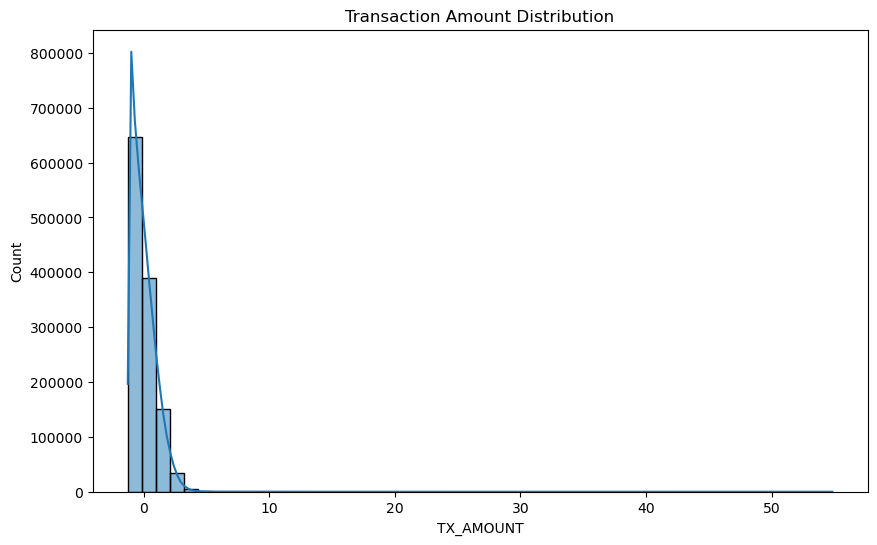

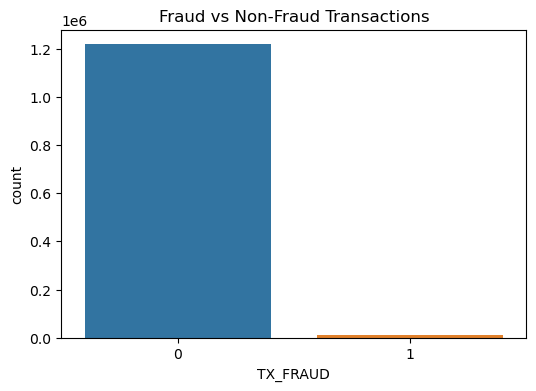

In [4]:
# 4. Exploratory Data Analysis (EDA)
"""
### 4. Exploratory Data Analysis (EDA)

Let's visualize some key distributions and relationships in the dataset to understand the fraud patterns.
"""

# Plot distribution of TX_AMOUNT
plt.figure(figsize=(10, 6))
sns.histplot(X_train['TX_AMOUNT'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()

# Plot fraud vs non-fraud transaction counts
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

In [5]:
# 5. Model Training and Evaluation
"""
### 5. Model Training and Evaluation

We'll train four different classifiers: Logistic Regression, K-Nearest Neighbors, MLP (Neural Networks), and SVM.
Each model will be evaluated using accuracy, precision, recall, F1-score, and a confusion matrix.
"""

# Define a function to train and evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"{model_name} Classification Report:\n", classification_report(y_test, y_pred))
    print(f"{model_name} Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [6]:
# 5.1 Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
evaluate_model(log_reg, X_train, X_test, y_train, y_test, "Logistic Regression")

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    521843
           1       0.00      0.00      0.00      4404

    accuracy                           0.99    526247
   macro avg       0.50      0.50      0.50    526247
weighted avg       0.98      0.99      0.99    526247

Logistic Regression Confusion Matrix:
 [[521843      0]
 [  4404      0]]


In [7]:
# 5.2 K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn, X_train, X_test, y_train, y_test, "K-Nearest Neighbors")

K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    521843
           1       0.25      0.00      0.00      4404

    accuracy                           0.99    526247
   macro avg       0.62      0.50      0.50    526247
weighted avg       0.99      0.99      0.99    526247

K-Nearest Neighbors Confusion Matrix:
 [[521840      3]
 [  4403      1]]


In [8]:
# 5.3 Multi-Layer Perceptron (MLP)
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
evaluate_model(mlp, X_train, X_test, y_train, y_test, "Multi-Layer Perceptron")

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Multi-Layer Perceptron Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    521843
           1       0.00      0.00      0.00      4404

    accuracy                           0.99    526247
   macro avg       0.50      0.50      0.50    526247
weighted avg       0.98      0.99      0.99    526247

Multi-Layer Perceptron Confusion Matrix:
 [[521843      0]
 [  4404      0]]


In [9]:
# 6. Saving the Best Model
"""
### 6. Saving the Best Model

Based on the evaluation metrics, we'll save the best-performing model (in this case, choose based on F1-score or accuracy) for future use.
"""

# Choose KNN model to save as an example (replace with best model based on evaluation)
best_model = knn

# Create the models directory if it doesn't exist
if not os.path.exists('./model/'):
    os.makedirs('./model/')

# Save the best model
with open('./model/best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Best model saved as 'best_model.pkl' in the 'model/' directory.")

Best model saved as 'best_model.pkl' in the 'model/' directory.


In [10]:
# 7. Conclusion and Future Work
"""
### 7. Conclusion and Future Work

We successfully built and evaluated multiple models to detect fraudulent transactions. We saved the best-performing model for future deployment.

#### Next Steps:
1. Hyperparameter tuning for improving model performance.
2. Incorporating additional features such as transaction location, frequency, etc.
3. Implementing advanced models like XGBoost or Random Forest.
"""

'\n### 7. Conclusion and Future Work\n\nWe successfully built and evaluated multiple models to detect fraudulent transactions. We saved the best-performing model for future deployment.\n\n#### Next Steps:\n1. Hyperparameter tuning for improving model performance.\n2. Incorporating additional features such as transaction location, frequency, etc.\n3. Implementing advanced models like XGBoost or Random Forest.\n'